# 0.) Import the Credit Card Fraud Data From CCLE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/7b/jmxrs8s50bx8fxdg6nst2hn80000gn/T/ipykernel_47415/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/7b/jmxrs8s50bx8fxdg6nst2hn80000gn/T/ipykernel_47415/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [14]:
over_log.score(X_test, y_test)

0.9347033278149668

In [15]:
under_log.score(X_test, y_test)

0.9371865927685405

In [16]:
smote_log.score(X_test, y_test)

0.9341754840567192

In [17]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [18]:
# Sensitivity here in credit fraud is more important as seen from last class

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_true = y_test

In [21]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77677,  5362],
       [   81,   238]])

In [22]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7460815047021944


In [23]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77883,  5156],
       [   80,   239]])

In [24]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7492163009404389


In [25]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77632,  5407],
       [   80,   239]])

In [26]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7492163009404389


# 6.) Pick two features and plot the two classes before and after SMOTE.
( the plot can't be plotted by the code provided)

In [31]:
X_train_df = pd.DataFrame(X_train,columns=X.columns)
y_train_df = pd.DataFrame(y_train,columns=["is_fraud"])
raw_temp = pd.concat([X_train_df, y_train_df], axis=1)
#raw_temp = pd.concat([X_train, y_train], axis=1)

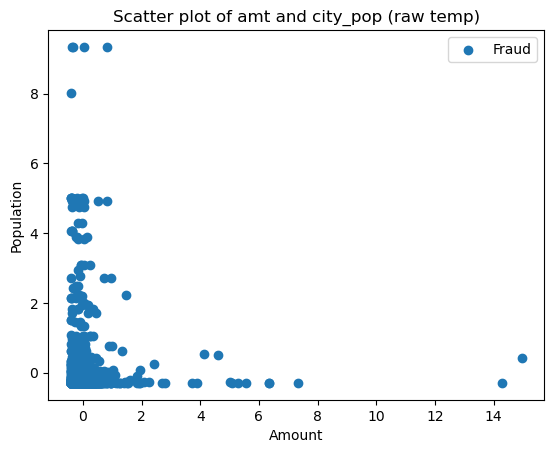

In [33]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
selected_vars = ["amt", "city_pop"]
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("Scatter plot of {} and {} (raw temp)".format(selected_vars[0], selected_vars[1]))
plt.show()

In [35]:
smote_X_df = pd.DataFrame(smote_X,columns=X.columns)
smote_y_df = pd.DataFrame(smote_y,columns=["is_fraud"])
raw_temp = pd.concat([smote_X_df, smote_y_df], axis =1)
#raw_temp = pd.concat([smote_X, smote_y], axis =1)


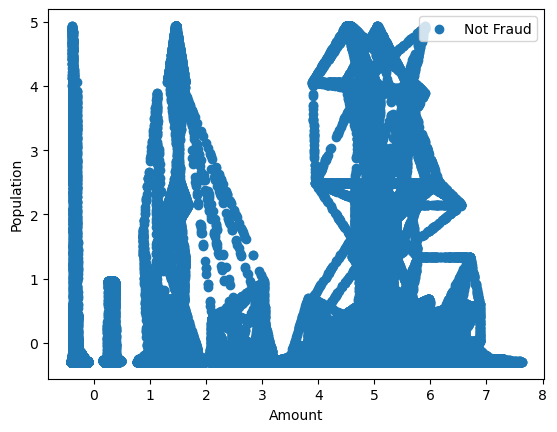

In [36]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [30]:
resampling_method ={
    'over': RandomOverSampler(),
    'under':RandomUnderSampler(),
    'smote':SMOTE()
}
model_configs={
    'LOG':LogisticRegression(),
    'LASSO':LogisticRegression(penalty = 'l1',
                              C= 2., solver ='liblinear'),
    "DTREE": DecisionTreeClassifier()
}

In [31]:
def calc_perfmetric(y_true, y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity=tp/(tp+fn) 
    specificity= tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return(sensitivity, specificity, precision, recall, f1)

In [32]:
trained_models = {}
results =[]

In [33]:
for resample_key, resampler in resampling_method.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)
   
    for model_key, model in model_configs.items():
        conbined_key = f'{resample_key}_{model_key}'
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[conbined_key] = m
        
        y_pred = m.predict(X_test)
       
        sensitivity,specificity,precision,recall,f1 = calc_perfmetric(y_true, y_pred)
        
        results.append({'Model': conbined_key,
                       "Sensitivity": sensitivity,
                       'specificity':specificity,
                       'precision':precision,
                       'recall':recall,
                       'f1':f1})
        
        

In [34]:
results_df = pd.DataFrame(results)

In [35]:
results_df

,Model,Sensitivity,specificity,precision,recall,f1
0,over_LOG,0.731778,0.930410,0.041639,0.731778,0.078795
1,over_LASSO,0.731778,0.930398,0.041632,0.731778,0.078782
2,over_DTREE,0.548105,0.998386,0.583851,0.548105,0.565414
3,under_LOG,0.725948,0.937192,0.045579,0.725948,0.085773
4,under_LASSO,0.725948,0.937132,0.045538,0.725948,0.085700
5,under_DTREE,0.944606,0.942806,0.063880,0.944606,0.119668
6,smote_LOG,0.734694,0.928495,0.040724,0.734694,0.077170
7,smote_LASSO,0.734694,0.928483,0.040717,0.734694,0.077159
8,smote_DTREE,0.725948,0.992748,0.292597,0.725948,0.417085


<font size=3>Answer: 
<font size=3>1. I find the pattern that the specificity of all models with overresampling are all higher than the other two resampling methods respectively.
<font size=3>2. Also, I find the pattern that f1 scores of decision tree models for all resampling methods are all higher than other models.

<font size=3>If we want to find the balance of precision and recall, we should look f1 score to find the optimal model. From this table, since we can see f1 scores of decision tree models for all resampling methods are all higher than other models, we then consider other scores in different resampling methods in decision tree models.  Although under_DTREE has the highest sensitivity and over_DTREE has the highest specifivity, their other scores are too low. Considering the balanced and moderate scores for smote_DTREE, I think smote_DTREE is the optimal one. However, in reality, it is really based on what we need like if If we care more about capturing as many positive cases as possible we might consider high sensitivity in priority, in which case under_DTREE might be considered the best.